[View in Colaboratory](https://colab.research.google.com/github/MarlonCajamarca/Deep-Learning-playground/blob/master/Perceptron.ipynb)

# **Perceptron Algorithm**
---



1. Initialize the weights to 0 or small random numbers
2. For each training example $x_i$:

> a. Compute output prediction $\hat{y_i}$.

> b. Compute the loss function

> c. Update the weights $w$ using **perceptron learning rule**:

>> $w_j = w_j + \Delta w_j$

>> $\Delta w_j = \eta (target^i - pred^i) x_j^i$

>> $\Delta w_j = \eta (y^i - \hat{y}^i) x_j^i$

3. Perceptron will converge if two classes are linear separable and learning rate $\eta$ is sufficiently small.



![Perceptron Learning algorithm](https://sebastianraschka.com/images/faq/classifier-history/perceptron-figure.png)



**Perceptron Algorithm in Python for Iris Dataset Classification**

**1. The perceptron python interface**

- Object-oriented Python Classes for creating different perceptrons experiments.

- **```fit```** and **```predict```** methods for training and testing algorithm.

- atributes created inside the interface (appart from initialization parameters) will have an appended underscore, i.e. **```self.w_```**



In [0]:
# Perceptron Implementation

import numpy as np

In [0]:
class Perceptron(object) :
  """
  Parameters (given to initialize object)
  __________
  eta: float
    Learning rate
  n_iter = int
    #Epochs - Passes over the training data
  random_state = int
    Random number generator seed for random weight initialization
    
  
  Attributes (created during methods execution)
  __________
  w_ : float 1d array
    Weights or learnable parameters
  errors_ : int list
    Errors or missclassifications for each Epoch. Stored in a list
    
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=19):
    """Importing and initializing input parameters for the object"""
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    
  def fit(self, X, y):
    """ Train the perceptron using X input data and y true labels"""
    rgen = np.random.RandomState(self.random_state)
    # Randomly initialize weight vector using normal distribution with 
    # mean=0.0, std=0.01 and output a vector of num_weights = 1 + num_features 
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []
    for i in range(self.n_iter):
      error = 0
      for x_i, y_i in zip(X, y):
        loss = y_i - self.predict(x_i)
        update = self.eta * loss
        # Updating weights
        self.w_[1:] += update * x_i
        # Updating bias
        self.w_[0] += update
        # Calculating accumulated prediction error - +1 if error +0 correct 
        # prediction
        error += int(update != 0.0)
      self.errors_.append(error)
    return self  
    
  def net_input(self, X):
    """Calculate the net input z = dot(w.T, x_i) + b"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
    
  def predict(self, X):
    """Return threshole prediction based on z"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

**2. Training Perceptron model on Iris Dataset**
- Import Iris Dataset suing ```pandas``` python library.
- Use only 2 of the 3 classes to perform binary classification.
- Consider only 2 of the 4 features for each sample.
- Use Perceptron Interface for binary classification on Iris Dataset.

In [0]:
import pandas as pd

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


- Choosing only first 100 samples containing 50  samples of Iris-setosa and 50 samples from Iris-versicolor. 
- Iris-Versicolor will be class 1 and Iris-setosa will be class -1 (Binary classification problem)
- Pandas ```values``` method will be used for convert labels into Numpy arrays.
- We use only 2 features from all 4 features to create ```X```input matrix. We will use 1th feature column (sepal length) and 3rd feature column (petal length) as the features for each training example.

In [5]:
# Select only setosa and versicolor input samples (first 100 samples)
# Use pd.values to obtain Numpy arrays & df.iloc[] to slice the input Dataframe
X = df.iloc[:100, [0,2]].values

y = df.iloc[:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

print(X[99])
print(y[99])

[5.7 4.1]
1


In [0]:
import matplotlib.pyplot as plt

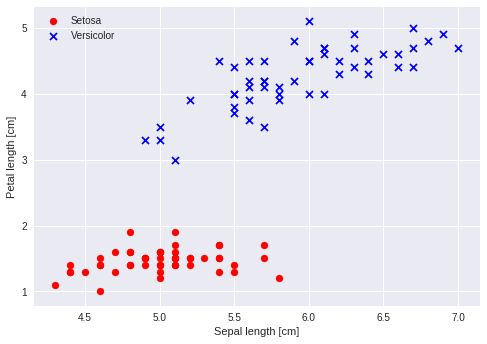

In [9]:
# Plotting data using matplotlib python library
plt.scatter(X[:50, 0], X[:50, 1], 
            c = "red", 
            marker = "o", 
            label = "Setosa")
plt.scatter(X[50:, 0], X[50:, 1],
            c = "blue",
            marker = "x",
            label = "Versicolor")
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc = "upper left")
plt.show()

We can see 2 classes **Setosa-Versicolor** are linear separable when using **Sepal and Petal length** features. Therefore, Perceptron will converge to the best weights $w, b$ needed to perform the binary classification automatically.

Now we need to:
- Train a perceptron on the Iris Data-subset we already have.
- Plot the errors for each Epoch to asses convergence.

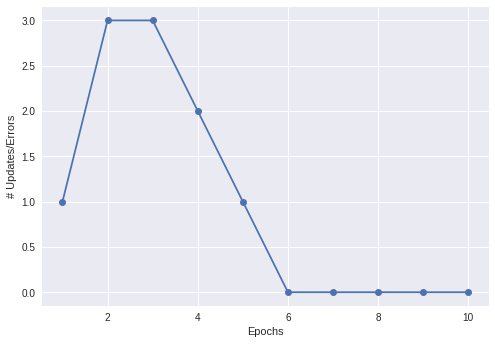

In [10]:
# Creating a new Perceptron 
perceptron_1 = Perceptron(eta = 0.1, n_iter = 10, random_state= 19)

# Training perceptron on training data X and y
perceptron_1.fit(X, y)

# Plotting errors for each epoch
plt.plot(range(1, len(perceptron_1.errors_) + 1),
         perceptron_1.errors_,
         marker = "o")
plt.xlabel("Epochs")
plt.ylabel("# Updates/Errors")
plt.show()

If we want to visualize the desicion boundary we will use a helper function showed on **Python ML book - Raschka**. The convenience function we will use is explained in detail within the book.

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  # setup market generator and color map
  markers = ("s", "x", "o", "^", "v")
  colors  = ("red", "blue", "lightgreen", "grey", "cyan")
  cmap = ListedColormap(colors[: len(np.unique(y))])
  
  # Find min and max values from each feature
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  
  # Create a meshgrid using min and max values for each feature
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  # Make predictions using meshgrid points
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  
  # plot decision boundary
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  # Plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0],
                y = X[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = cl,
                edgecolor = "black")

Now we use the helper function **```plot_decision_regions```** for plotting the decision boundary of our trained perceptron.

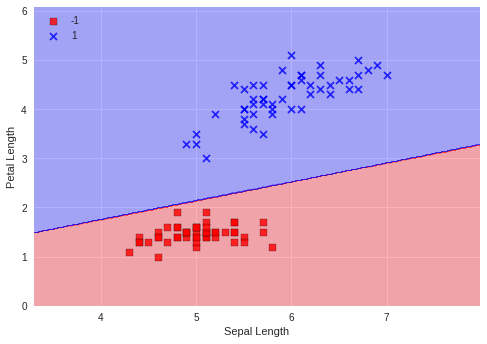

In [16]:
plot_decision_regions(X, y, classifier = perceptron_1)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend(loc = "upper left")
plt.show()

We can see the decision boundary learned by the perceptron. This case it learned to correctly classify each sample on Iris-subset. Note that perceptron will converge (weight values stop updating) only if data points are linearly-separable.